## Tugas Kuis

Anggota Kelompok : 
1. I Made Rama Dwipa Raharja (230030278)
2. Kadek Febryanta (23003060?)

Note : Untuk tugas kuis ini kami sepakat untuk memilih poin 2

In [34]:
import cv2 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

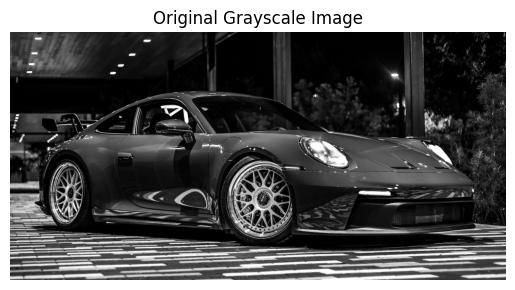

In [35]:
# Kode ini untuk membaca file dan
img = cv2.imread('Porche.jpg')

if img is None:
	raise FileNotFoundError("Gambar Tidak Ditemukan")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()

## Mengubah Color Gambar
Pada tahap ini warna awal gambar diubah menjadi Grayscale melalui proses konversi dari ruang warna BGR (Blue, Green, Red) menjadi grayscale menggunakan fungsi cv2.cvtColor().

**Tujuan:**
- Menyederhanakan data citra
- Memudahkan analisis histogram
- Sebagai referensi awal sebelum dilakukan operasi

**Karakteristik:**
- Menyederhanakan data menjadi satu channel intensitas
- Memberikan dasar analisis histogram yang jelas
- Mengoptimalkan pemrosesan untuk operasi berbasis intensitas




In [36]:
# Membuat fungsi untuk menampilkan gambar
def show_image(image, title="Image"):
	plt.imshow(image, cmap='gray')
	plt.title(title)
	plt.axis('off')
	plt.show()

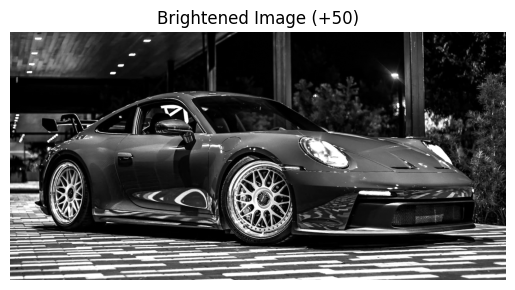

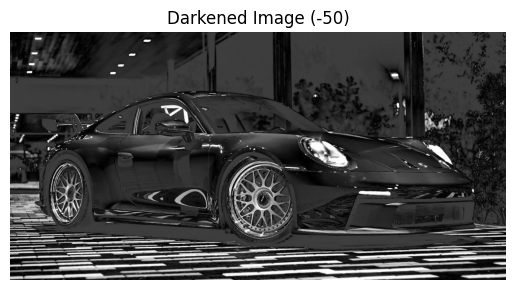

In [37]:
bright = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=50)
dark = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=-50)
show_image(bright, "Brightened Image (+50)")
show_image(dark, "Darkened Image (-50)")

## Penjelasan Pada Bightened dan dark

Berdasarkan kode diatas terdapat 2 variabel yaitu bright dan dark, dari hasil gambar tersebut terdapat perbedaan yaitu : 

**Bright**
- Pada hasil gambar body mobil terlihat sedikit gelap
- Pada hasil gambar akurasi gambar lebih tajam dan lebih berbentuk

**Dark**
- pada hasil gambar body mobil terlihat lebih gelap
- pada hasil gambar cenderung kurang akurat dan kurang tajan

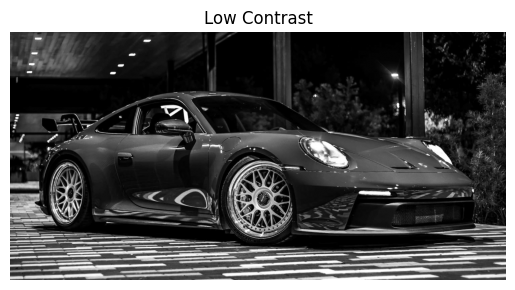

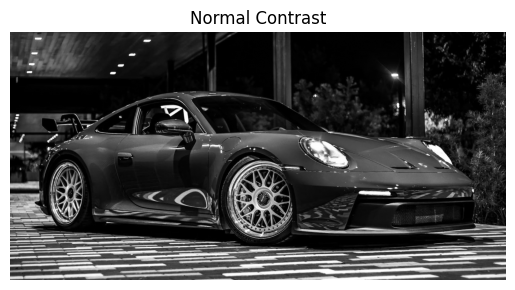

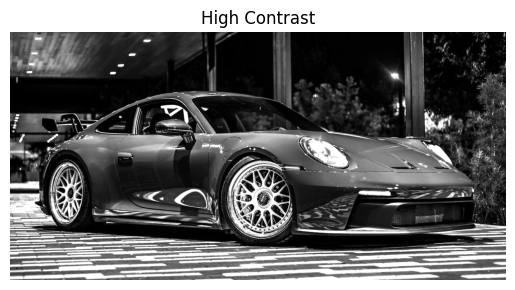

In [38]:
low_contrast = cv2.convertScaleAbs(img_gray, alpha=0.5, beta=128)
normal_contrast = cv2.convertScaleAbs(img_gray, alpha=1.0, beta=0)
high_contrast = cv2.convertScaleAbs(img_gray, alpha=1.5, beta=0)
show_image(low_contrast, "Low Contrast")
show_image(normal_contrast, "Normal Contrast")
show_image(high_contrast, "High Contrast")

## Perbedaan antara low contrast, normal contrast, high contrast

Dari hasil 3 gambar yang ditampilkakan, kurang lebih hampir mirip untuk setiap level contrastnya tetapi masih memiliki perbedaan masing masing yaitu :

**Low Contrast**
- warna pada gambar lebih gelap
- object object pada gambar tidak terlihat jelas

**Normal Contrast**
- warna pada gambar tidak berbeda jauh dengan low contrast
- object object pada gambar kurang terlihat jelas

**High Contrast**
- warna pada gambar lebih terang
- pada gambar object object lebih terlihat jelas

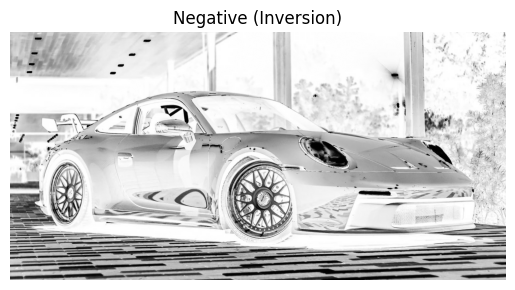

In [39]:
negative = 255 - img_gray
show_image(negative, "Negative (Inversion)")

## Mengubah gambar menjadi negative (Inversion)

berbeda dengan hasil proses mengubah gambar sebelumnya, gambar yang dihasilkan melalui proses inversion menjadi putih secara keseluruhan dengan nilai mendekati maksimum intensitas(255).

**Negative (Inversion):**
- Intensitas warna pixcel menjadi sangat tinggi (terang)
- Pada bagian yang sebelum dikonversi memiliki warna terang berubah menjadi lebih gelap 
jika dilihat pada gambar yaitu pada bagian lampu mobil

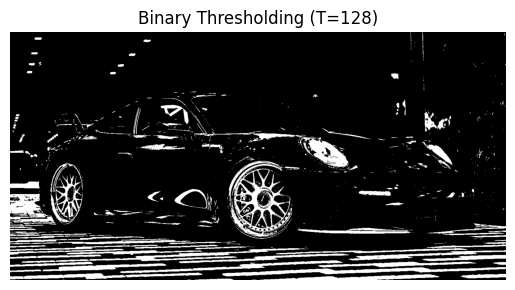

In [40]:
_, binary = cv2.threshold(img_gray, 128, 255, cv2.THRESH_BINARY)
show_image(binary, "Binary Thresholding (T=128)")

## Mengubah 

Berikan penjelasan

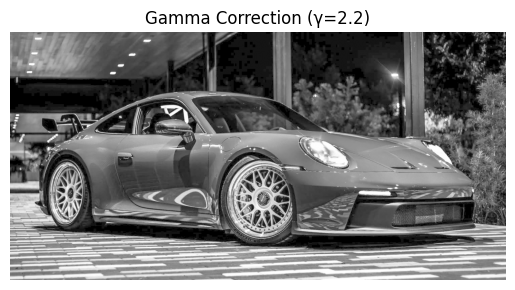

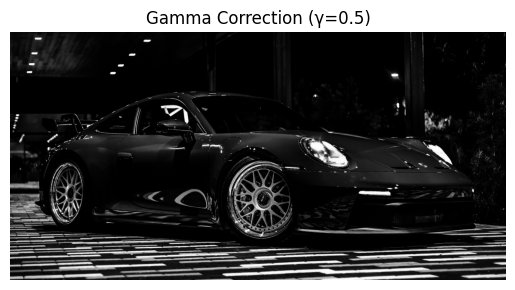

In [41]:
def gamma_correction(img, gamma):
    invGamma = 1.0 / gamma
    table = np.array([(i/255.0)**invGamma * 255 for i in range(256)]).astype("uint8")
    return cv2.LUT(img, table)

gamma_dark = gamma_correction(img_gray, 2.2)   # gamma > 1 darkens
gamma_light = gamma_correction(img_gray, 0.5)  # gamma < 1 brightens

show_image(gamma_dark, "Gamma Correction (γ=2.2)")
show_image(gamma_light, "Gamma Correction (γ=0.5)")

## Gamma Correction

Terdapat dua gambar dengan value Gamma Correction yang berbeda beda. Gamma Correction ini berfungsi sebagai menyesuaikan tingkat kecerahan citra.

Perbedaan antara gambar 1 dengan gambar 2 yaitu : 

**Gambar 1**
- Gamma corection yang digunakan (y = 2.2) yang menghasilkan warna gambar menjadi lebih terang
- hasil yang diberikan lebih terlihat

**Gambar 2**
- Gamma Correction yang digunakan (y = 0.5) yang menghasilkan warna gambar menjadi lebih hitam
- hasil yang diberikan lebih hitam dan object object kurang terlihat dengan jelas

## Kode Dari file 04_filter.ipynb

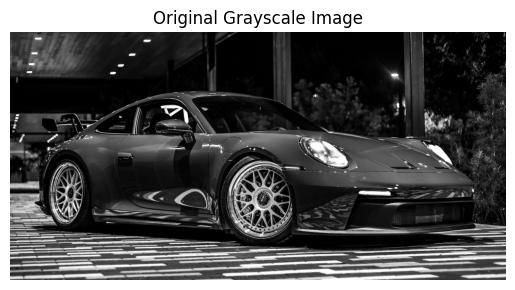

In [42]:
img = cv2.imread('Porche.jpg') # Adjust the path as necessary

if img is None:
	raise FileNotFoundError("Image file not found. Please check the path.")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.title("Original Grayscale Image")
plt.axis('off')
plt.show()


1. MATRIX PIXEL INPUT (7x7):


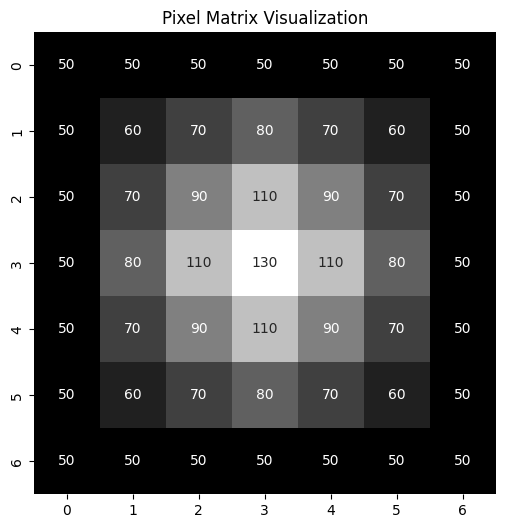

In [43]:
pixel_matrix = np.array([
    [50,  50,  50,  50,  50,  50,  50],
    [50,  60,  70,  80,  70,  60,  50],
    [50,  70,  90, 110,  90,  70,  50],
    [50,  80, 110, 130, 110,  80,  50],
    [50,  70,  90, 110,  90,  70,  50],
    [50,  60,  70,  80,  70,  60,  50],
    [50,  50,  50,  50,  50,  50,  50]
], dtype=np.float32)

print("\n1. MATRIX PIXEL INPUT (7x7):")

# Visualisasi matrix pixel
plt.figure(figsize=(6, 6))
sns.heatmap(pixel_matrix, annot=True, fmt=".0f", cmap="gray", cbar=False, square=True)
plt.title("Pixel Matrix Visualization")
plt.show()


2a. AVERAGE/BOX BLUR KERNEL (3x3):


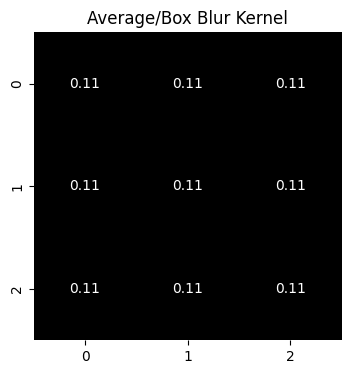

In [44]:
# 2. Definisikan berbagai kernel filter (3x3)
# a. Average/Box Blur Kernel
average_kernel = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
], dtype=np.float32) / 9

print("\n2a. AVERAGE/BOX BLUR KERNEL (3x3):")

# Visualisasi kernel
plt.figure(figsize=(4, 4))
sns.heatmap(average_kernel, annot=True, fmt=".2f", cmap="gray", cbar=False, square=True)
plt.title("Average/Box Blur Kernel")
plt.show()


Contoh Konvolusi pada Piksel Tengah [3, 3]:
Nilai Piksel Asli: 130

Region of Interest (ROI) 3x3:


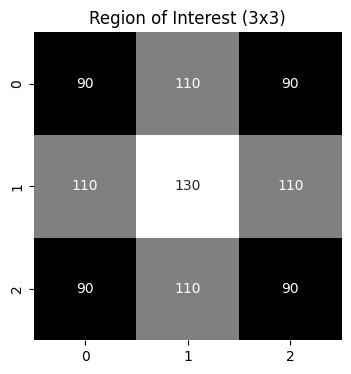

In [45]:
# Contoh detail konvolusi pada satu piksel (tengah matrix)
center_i, center_j = 3, 3
print(f"\nContoh Konvolusi pada Piksel Tengah [{center_i}, {center_j}]:")
print(f"Nilai Piksel Asli: {pixel_matrix[center_i, center_j]:.0f}")

# Ambil ROI 3x3 di sekitar piksel tengah
roi = pixel_matrix[center_i-1:center_i+2, center_j-1:center_j+2]
print(f"\nRegion of Interest (ROI) 3x3:")

# Visualisasi ROI
plt.figure(figsize=(4, 4))
sns.heatmap(roi, annot=True, fmt=".0f", cmap="gray", cbar=False, square=True)
plt.title("Region of Interest (3x3)")
plt.show()


Konvolusi dengan Average Kernel:
ROI × Kernel:


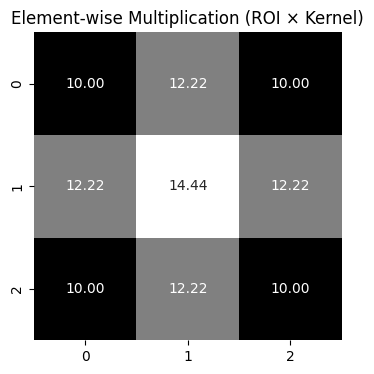

Sum (Hasil Konvolusi): 103.33


In [46]:
# Hitung konvolusi dengan Average Kernel
print(f"\nKonvolusi dengan Average Kernel:")
print("ROI × Kernel:")
element_wise = roi * average_kernel

# Visualisasi element-wise multiplication
plt.figure(figsize=(4, 4))
sns.heatmap(element_wise, annot=True, fmt=".2f", cmap="gray", cbar=False, square=True)
plt.title("Element-wise Multiplication (ROI × Kernel)")
plt.show()

result = np.sum(element_wise)
print(f"Sum (Hasil Konvolusi): {result:.2f}")


Ukuran Matrix Pixel: 7x7
Ukuran Kernel: 3x3
Padding yang Dibutuhkan: Height=1, Width=1


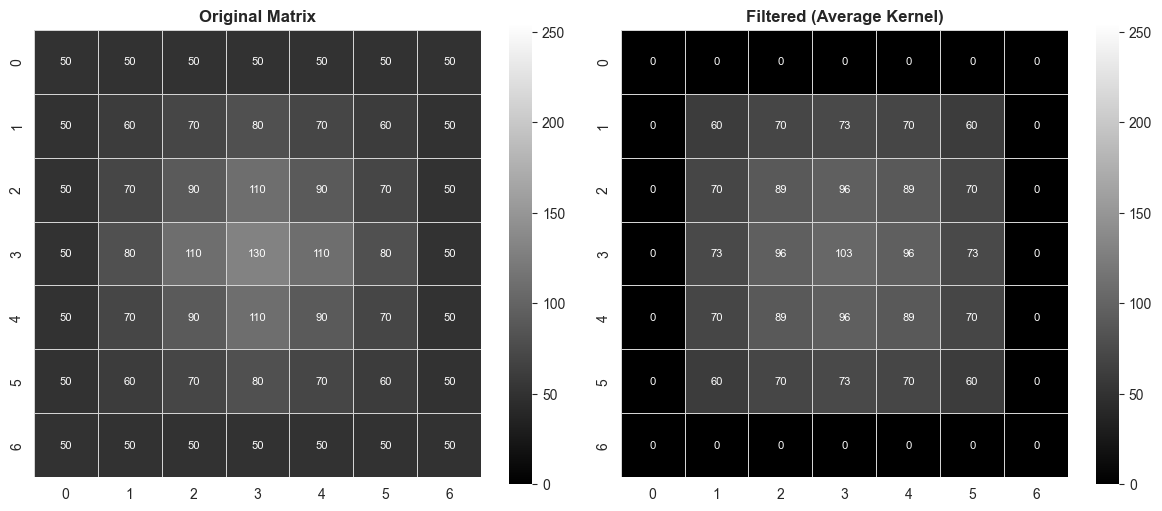

In [47]:
# Terapkan filter ke seluruh matrix pixel menggunakan konvolusi manual
img_height, img_width = pixel_matrix.shape
print(f"\nUkuran Matrix Pixel: {img_height}x{img_width}")
kernel_height, kernel_width = average_kernel.shape
print(f"Ukuran Kernel: {kernel_height}x{kernel_width}")

# Hitung padding yang dibutuhkan
pad_h = kernel_height // 2
pad_w = kernel_width // 2
print(f"Padding yang Dibutuhkan: Height={pad_h}, Width={pad_w}")

# Buat output matrix dengan ukuran yang sama dengan input
output = np.zeros_like(pixel_matrix)

# Lakukan konvolusi manual
for i in range(pad_h, img_height - pad_h):
    for j in range(pad_w, img_width - pad_w):
        # Ambil region of interest (ROI)
        roi = pixel_matrix[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
        
        # Element-wise multiplication dan sum
        output[i, j] = np.sum(roi * average_kernel)


# Original
# Create figure with seaborn style
sns.set_style("white")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original
sns.heatmap(pixel_matrix, annot=True, fmt='.0f', cmap='gray', cbar=True, 
            ax=axes[0], square=True, linewidths=0.5, linecolor='lightgray',
            vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
axes[0].set_title('Original Matrix', fontsize=12, fontweight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('')

# Filtered
sns.heatmap(output, annot=True, fmt='.0f', cmap='gray', cbar=True, 
            ax=axes[1], square=True, linewidths=0.5, linecolor='lightgray',
            vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
axes[1].set_title('Filtered (Average Kernel)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [48]:
def manual_convolution(image, kernel):
    """
    Melakukan konvolusi manual antara image dan kernel
    """
    # Ukuran image dan kernel
    img_height, img_width = image.shape
    kernel_height, kernel_width = kernel.shape
    
    # Hitung padding yang dibutuhkan
    pad_h = kernel_height // 2
    pad_w = kernel_width // 2
    
    # Buat output matrix dengan ukuran yang sama dengan input
    output = np.zeros_like(image)
    
    # Lakukan konvolusi
    for i in range(pad_h, img_height - pad_h):
        for j in range(pad_w, img_width - pad_w):
            # Ambil region of interest (ROI)
            roi = image[i-pad_h:i+pad_h+1, j-pad_w:j+pad_w+1]
            
            # Element-wise multiplication dan sum
            output[i, j] = np.sum(roi * kernel)
    
    return output

def visualize_comparison(original, output):
    sns.set_style("white")
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Original
    sns.heatmap(original, annot=True, fmt='.0f', cmap='gray', cbar=True, 
                ax=axes[0], square=True, linewidths=0.5, linecolor='lightgray',
                vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
    axes[0].set_title('Original Matrix', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('')

    # Filtered
    sns.heatmap(output, annot=True, fmt='.0f', cmap='gray', cbar=True, 
                ax=axes[1], square=True, linewidths=0.5, linecolor='lightgray',
                vmin=0, vmax=255, annot_kws={"size": 8, "color": "white"})
    axes[1].set_title('Filtered (Average Kernel)', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')

    plt.tight_layout()
    plt.show()

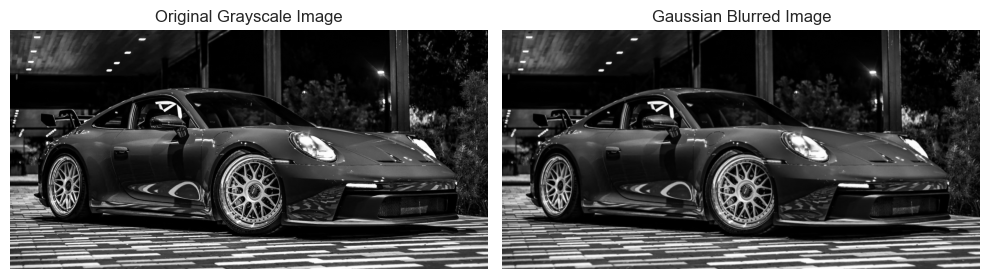

In [49]:
blurred_image = cv2.GaussianBlur(img_gray, (3, 3), 0)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(blurred_image, cmap='gray')
axes[1].set_title("Gaussian Blurred Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

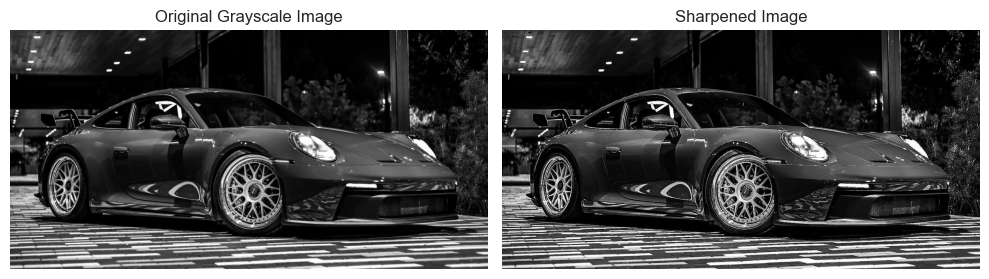

In [50]:
kernel = np.array([[0, -1, 0], [-1, 5,-1], [0, -1, 0]])
sharpened_image = cv2.filter2D(img_gray, -1, kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(sharpened_image, cmap='gray')
axes[1].set_title("Sharpened Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

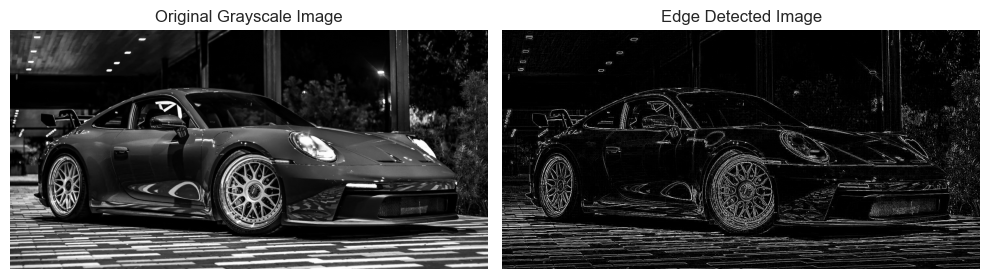

In [51]:
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
edge_detected_image = cv2.filter2D(img_gray, -1, kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(edge_detected_image, cmap='gray')
axes[1].set_title("Edge Detected Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

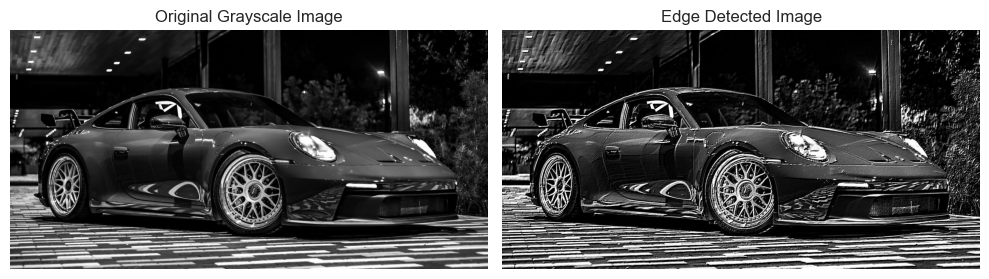

In [52]:
kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
edge_detected_image = cv2.filter2D(img_gray, -1, kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(edge_detected_image, cmap='gray')
axes[1].set_title("Edge Detected Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()

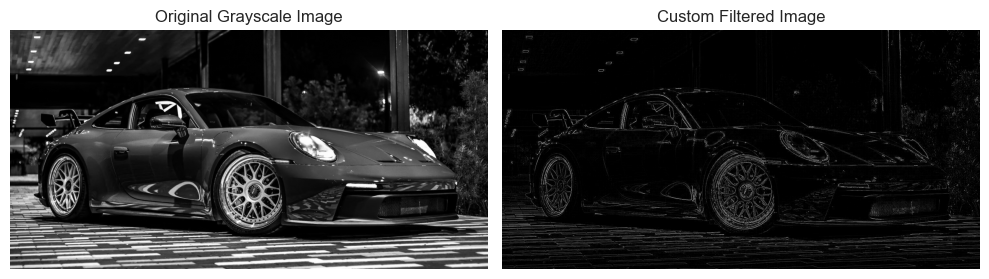

In [53]:
custom_kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
custom_filtered = cv2.filter2D(img_gray, -1, custom_kernel)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title("Original Grayscale Image")
axes[0].axis('off')

axes[1].imshow(custom_filtered, cmap='gray')
axes[1].set_title("Custom Filtered Image")
axes[1].axis('off')

plt.tight_layout()
plt.show()